In [1]:
from keras import models
from keras import layers
from keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

2024-03-30 14:03:56.346413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 0us/step


In [3]:
def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension = 46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

In [6]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

2024-03-30 14:25:33.748051: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 41ms/step - loss: 2.9239 - accuracy: 0.4568 - val_loss: 1.9511 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.5991 - accuracy: 0.6800 - val_loss: 1.4085 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.2155 - accuracy: 0.7383 - val_loss: 1.2332 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.9971 - accuracy: 0.7834 - val_loss: 1.1095 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8366 - accuracy: 0.8210 - val_loss: 1.0197 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6997 - accuracy: 0.8480 - val_loss: 0.9832 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5881 - accuracy: 0.8732 - val_loss: 0.9278 - val_accuracy: 0.8010
Epoch 8/20
16

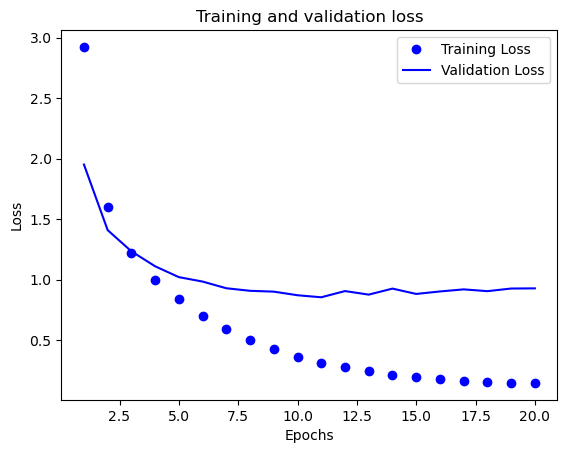

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

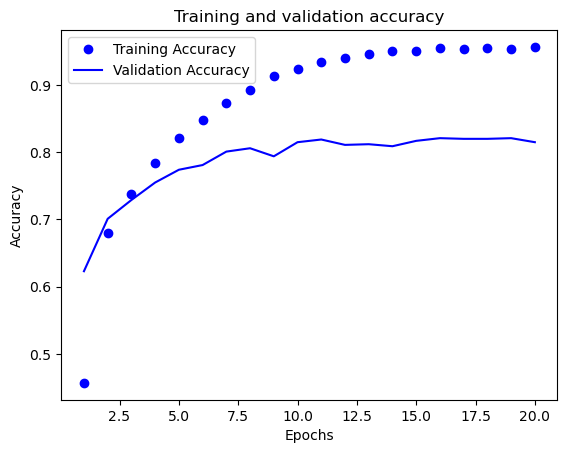

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 42ms/step - loss: 2.7082 - accuracy: 0.4813 - val_loss: 1.8292 - val_accuracy: 0.6180
Epoch 2/9
16/16 [==============================] - 0s 29ms/step - loss: 1.5360 - accuracy: 0.6912 - val_loss: 1.3488 - val_accuracy: 0.7020
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.1604 - accuracy: 0.7532 - val_loss: 1.1715 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 27ms/step - loss: 0.9373 - accuracy: 0.8011 - val_loss: 1.0578 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.7716 - accuracy: 0.8380 - val_loss: 0.9936 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.6382 - accuracy: 0.8672 - val_loss: 0.9266 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 26ms/step - loss: 0.5342 - accuracy: 0.8885 - val_loss: 0.9020 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [18]:
results

[0.941007673740387, 0.7885128855705261]

In [19]:
predictons = model.predict(x_test)

71/71 [==============================] - 2s 30ms/step
